# Exploration of WHISE data

In [1]:
WHISE <- read.csv('data/WHISE.csv', header=T, stringsAsFactor=F)

In [2]:
dim(WHISE)

[1] 4347  192

In [4]:
summary(WHISE)

     IDc               photos_l     pathology_reason_l photo_quality_l
 Length:4347        Min.   :0.000   Min.   : 0.0000    Min.   :0.000  
 Class :character   1st Qu.:3.000   1st Qu.: 0.0000    1st Qu.:0.000  
 Mode  :character   Median :3.000   Median : 0.0000    Median :1.000  
                    Mean   :3.301   Mean   : 0.6307    Mean   :1.626  
                    3rd Qu.:3.000   3rd Qu.: 0.0000    3rd Qu.:4.000  
                    Max.   :7.000   Max.   :99.0000    Max.   :9.000  
                                    NA's   :96                        
 photo_quality_focus_l   PQ_field_l     PQ_Stereo_l      PQ_Other_l  
 Min.   :0.000         Min.   :0.000   Min.   :0.000   Min.   :0.00  
 1st Qu.:0.000         1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.00  
 Median :1.000         Median :0.000   Median :0.000   Median :0.00  
 Mean   :1.552         Mean   :1.499   Mean   :1.411   Mean   :1.57  
 3rd Qu.:4.000         3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:4.00  
 Max.   :9.0

## Missing value patterns: right eyes are missing more compared to the left eyes

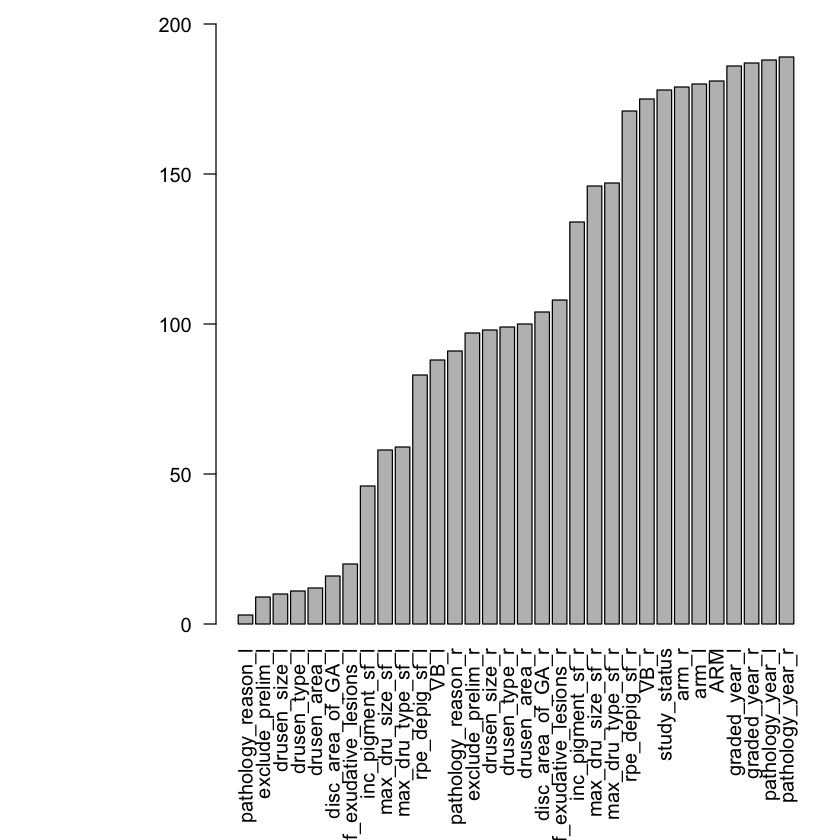

In [13]:
par(mar=c(9,9,1,1)) 
barplot(which(apply(WHISE, 2, function(x) { sum(is.na(x)) > 0 })), las=2, ylim=c(0, 200))

# Exploration of the MRI data

In [17]:
MRI.abnormal <- read.csv('data/MRI1_abnormalvol.csv', header=T, stringsAsFactor=F)

In [18]:
MRI.regional <- read.csv('data/MRI1_totalvol.csv', header=T, stringsAsFactor=F)

In [21]:
dim(MRI.abnormal)
dim(MRI.regional)

[1] 1403   95

[1] 1403   96

## There are no missing values in MRI data

In [19]:
summary(MRI.abnormal)

       id             mri_dy     medial_front_orbital_gyrus_right
 Min.   :100038   Min.   :2350   Min.   :0.00000                 
 1st Qu.:154706   1st Qu.:2767   1st Qu.:0.00000                 
 Median :201786   Median :2930   Median :0.00000                 
 Mean   :201750   Mean   :2923   Mean   :0.00221                 
 3rd Qu.:249747   3rd Qu.:3066   3rd Qu.:0.00000                 
 Max.   :299760   Max.   :3726   Max.   :0.30000                 
 middle_frontal_gyrus_right lateral_ventricle_left  insula_right    
 Min.   :0.00000            Min.   :0.0000         Min.   :0.00000  
 1st Qu.:0.00000            1st Qu.:0.0000         1st Qu.:0.00000  
 Median :0.00000            Median :0.1000         Median :0.00000  
 Mean   :0.02195            Mean   :0.1485         Mean   :0.02003  
 3rd Qu.:0.00000            3rd Qu.:0.2000         3rd Qu.:0.00000  
 Max.   :2.90000            Max.   :1.6000         Max.   :2.50000  
 precentral_gyrus_right lateral_front_orbital_gyrus_rt 

In [20]:
summary(MRI.regional)

       id             mri_dy     medial_front_orbital_gyrus_right
 Min.   :100038   Min.   :2350   Min.   :0.700                   
 1st Qu.:154706   1st Qu.:2767   1st Qu.:2.000                   
 Median :201786   Median :2930   Median :2.200                   
 Mean   :201750   Mean   :2923   Mean   :2.259                   
 3rd Qu.:249747   3rd Qu.:3066   3rd Qu.:2.500                   
 Max.   :299760   Max.   :3726   Max.   :4.400                   
 middle_frontal_gyrus_right lateral_ventricle_left  insula_right   
 Min.   : 5.50              Min.   : 3.80          Min.   : 2.000  
 1st Qu.:12.40              1st Qu.:13.75          1st Qu.: 5.300  
 Median :14.10              Median :18.30          Median : 5.900  
 Mean   :14.01              Mean   :20.00          Mean   : 6.008  
 3rd Qu.:15.70              3rd Qu.:24.20          3rd Qu.: 6.500  
 Max.   :22.20              Max.   :86.10          Max.   :12.500  
 precentral_gyrus_right lateral_front_orbital_gyrus_rt cingula

In [62]:
sum(MRI.regional[1,][2:95])
MRI.regional[1,96]

[1] 3409.6

[1] 1092.557

## Overlap between MRI and WHISE data yields 519 patients

In [53]:
library(dplyr)
library(ggplot2)

In [24]:
sum(MRI.regional$mri_dy == MRI.abnormal$mri_dy)

[1] 1403

In [37]:
data.merged <- left_join(MRI.regional, MRI.abnormal, by=c('id')) %>%
    inner_join(WHISE, by=c('id'='COMMON_ID'))

In [38]:
dim(data.merged)

[1] 519 381

## Construct/find indicator variables for patients that have retionpathy, are diabetic, have large cup to disk ratio

In [39]:
unique(data.merged$diabetic_retinopathy_level_l)

[1] 10 12 15 90 13 65 20 31

| code | meaning     |
|------|-------------|
| 10 | absent        |
| 12 | non-diabetic |
| 13 | questionable  |
| 14 | HE, SE, IRMA, without microaneurysms |
| 15 | Hem only with no microaneurysms |
| 20 | microaneurysm only |
| 31 |  Mild NPDR |
| 37 | Mild to Moderate NPDR |
| 43 | Moderate NPDR |
| 47 | Moderately Severe NPDR |
| 53 | Severe NPDR |
| 60 | Fibrous proliferation only |
| 61 | no retionapthy, with treatment |
| 62 |  MAs only with treatment |
| 63 | Mild NPDR, with treatment |
| 64 | Moderate to Severe NPDR, with treatment |
| 65 | moderate PDR |
| 71 | DRS HRC |
| 75 | Severe DRS HRC |
| 81 | Advanced PDR |
| 85 | End stage PDR |
| 90 | Canont grade |

In [48]:
sum(!data.merged$diabetic_retinopathy_level_l %in% c(10, 13, 61, 90) | !data.merged$diabetic_retinopathy_level_r %in% c(10, 13, 61, 90))

[1] 82

## large cup to disk ratio in the 519 patients

| Code | meaning |
|------|---------|
| 0    | None    |
| 1    | Questionable |
| 2    | Present      |
| 8    | Cannot grade |
| 9    | Do not know  |

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


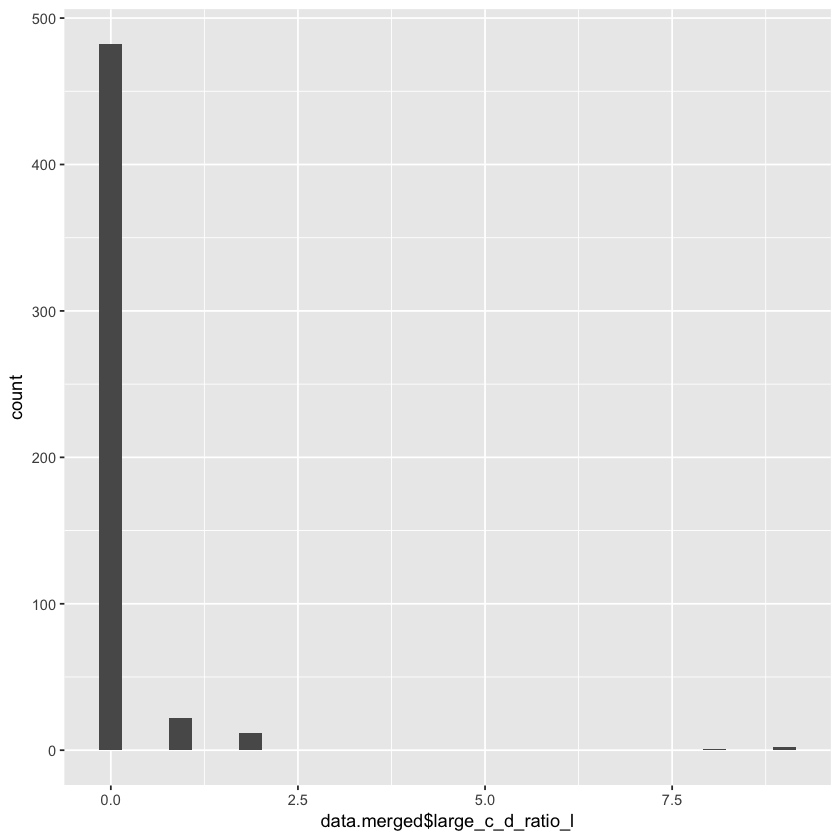

In [54]:
ggplot() +
    geom_histogram(aes(x=data.merged$large_c_d_ratio_l))

In [58]:
sum(data.merged$large_c_d_ratio_l == 2)
sum(data.merged$large_c_d_ratio_l == 0)

[1] 12

[1] 482

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


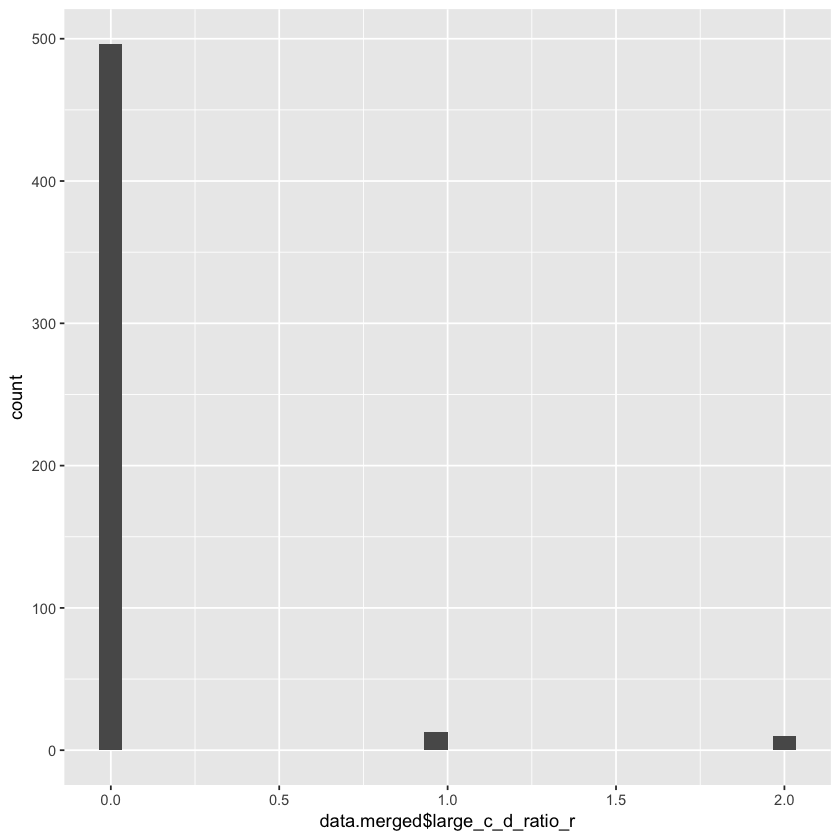

In [55]:
ggplot() +
    geom_histogram(aes(x=data.merged$large_c_d_ratio_r))

In [59]:
sum(data.merged$large_c_d_ratio_r == 2)
sum(data.merged$large_c_d_ratio_r == 0)

[1] 10

[1] 496